In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(
    fname=os.path.basename(train_dataset_url),
    origin=train_dataset_url
)
print("Local copy of the dataset file: {}".format(train_dataset_fp))

Local copy of the dataset file: /home/b1102/.keras/datasets/iris_training.csv


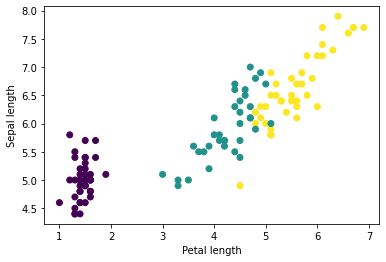

In [58]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
dataset = pd.read_csv(train_dataset_url, names=column_names, skiprows=1)

X = dataset.iloc[:, 0:-1]
Y = dataset.iloc[:, -1]

plt.scatter(X.iloc[:, 2], X.iloc[:, 0], c=Y, cmap='viridis')
plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

<h1>One hot encoding</h1>

In [59]:
Y = Y.values.reshape(-1, 1)

ec = OneHotEncoder(sparse=False)
Y = ec.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

<h1> Features scaling </h1>

In [60]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h1>Model</h1>

In [61]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))
ann.add(tf.keras.layers.Dense(units=3, activation='softmax'))
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train, Y_train, batch_size=16, epochs=50)

Epoch 1/50
6/6 [==============================] - 0s 2ms/step - loss: 0.9456 - accuracy: 0.4427
Epoch 2/50
6/6 [==============================] - 0s 853us/step - loss: 0.9804 - accuracy: 0.3659
Epoch 3/50
6/6 [==============================] - 0s 885us/step - loss: 0.9008 - accuracy: 0.4067
Epoch 4/50
6/6 [==============================] - 0s 818us/step - loss: 0.8588 - accuracy: 0.4521
Epoch 5/50
6/6 [==============================] - 0s 933us/step - loss: 0.8783 - accuracy: 0.4216
Epoch 6/50
6/6 [==============================] - 0s 2ms/step - loss: 0.8200 - accuracy: 0.4814
Epoch 7/50
6/6 [==============================] - 0s 858us/step - loss: 0.8188 - accuracy: 0.4862
Epoch 8/50
6/6 [==============================] - 0s 919us/step - loss: 0.8439 - accuracy: 0.4682
Epoch 9/50
6/6 [==============================] - 0s 2ms/step - loss: 0.7394 - accuracy: 0.5997
Epoch 10/50
6/6 [==============================] - 0s 918us/step - loss: 0.6595 - accuracy: 0.6754
Epoch 11/50
6/6 [========

<h1>Evaluation</h1>

In [62]:
results = ann.evaluate(X_test, Y_test, batch_size=32)
print("test loss, test acc:", results)

1/1 [==============================] - 0s 94ms/step - loss: 0.3385 - accuracy: 0.9167
test loss, test acc: [0.33847346901893616, 0.9166666865348816]
